## Praca domowa 4

#### Autor: Dominik Kędzierski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [12]:
df.loc[(df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
220,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
270,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
350,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
761,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
1016,1028,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.73
...,...,...,...,...,...,...,...,...,...,...,...
16225,16533,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01
16226,16534,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.00,0.00,0.01
16248,16558,Codename: Panzers Complete Collection,PC,2016.0,Strategy,Nordic Games,0.00,0.01,0.00,0.00,0.01
16263,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [27]:
df.groupby("Genre")[["Global_Sales", "Genre"]].agg("sum").reset_index().iloc[0,0]


'Action'

In [ ]:
df2 = df.groupby("Genre")[["EU_Sales", "JP_Sales", "Genre", ]].agg("mean").reset_index().loc[df.JP_Sales > df.EU_Sales]
df2 = df2.iloc[:,[0,2]].sort_values("JP_Sales", ascending=False, ignore_index=True)
df2.rename(columns={"Genre": "Typ Gry", "JP_Sales": "Średnia sprzedaż w Japonii"})

### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Oryginalny wykres ze strony https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparcie-wzroslo-wszystkim-tylko-nie-konfederacji-i-psl.
    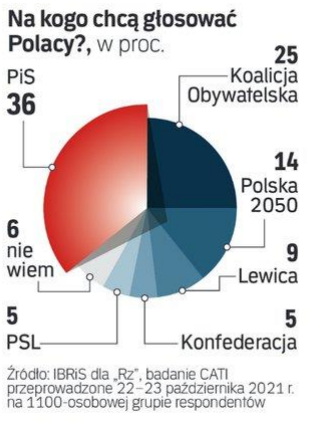

Poprawiony wykres: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/Dominik%20Kedzierski
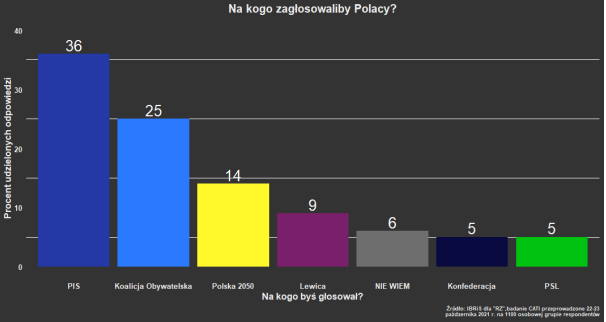

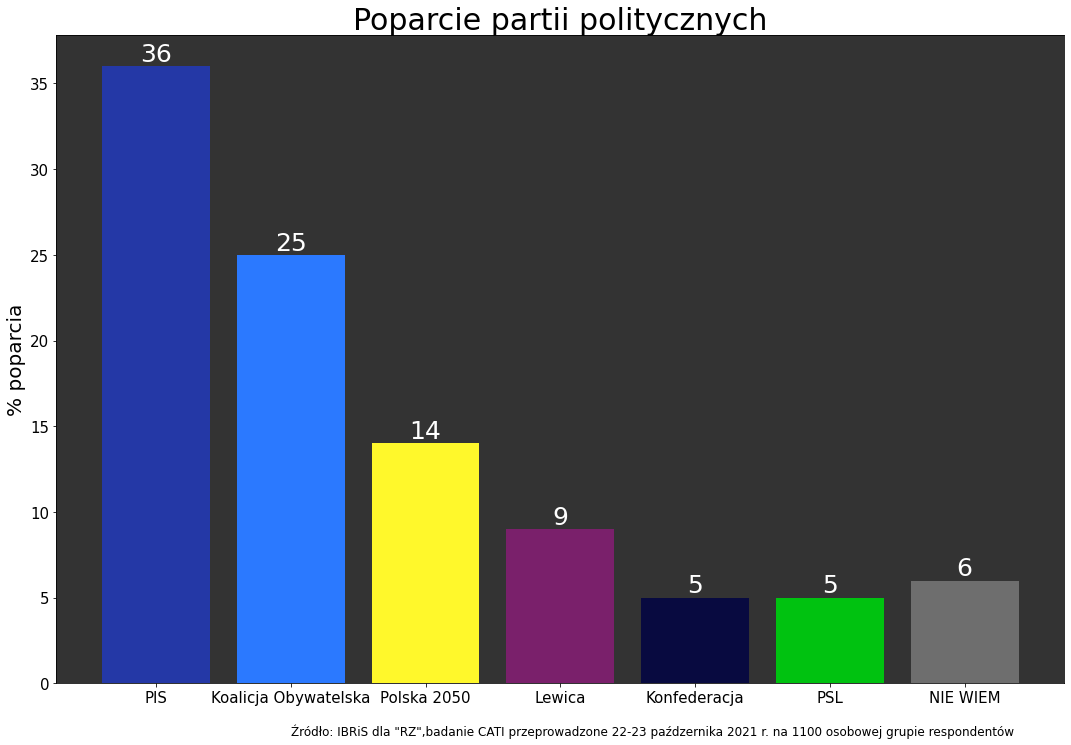

In [61]:
import matplotlib.pyplot as plt
partie = ["PIS", "Koalicja Obywatelska", "Polska 2050", "Lewica", "Konfederacja", "PSL", "NIE WIEM"]
poparcie = [36, 25, 14, 9, 5, 5, 6]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(partie,poparcie,color=['#2438a6', '#2b79ff','#fff82b',
                                       '#7a206b','#080a40','#00c210','#6e6e6e'])
fig.set_size_inches(14, 9)
ax.set_ylabel('% poparcia', size = 20)
ax.set_title('Poparcie partii politycznych', size = 30)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(15)
ax.bar_label(ax.containers[0], fontsize=25, color = 'w')

ax.set_facecolor('#333333')
ax.text(1, -3, "Źródło: IBRiS dla \"RZ\",badanie CATI przeprowadzone 22-23 paźdzernika 2021 r. na 1100 osobowej grupie respondentów", fontsize=12)
plt.show()

Wykres ten moim zdaniem jest lepszy z kilku powodów:

    1) Białe linie na wykresie przeszkadzały i zaburzały wygląd na pierwszym wykresie
    2) Tytuł bardziej oddaje sens wykresu
    3) Usunięcie zbędnego podpisu etykiety X
    4) słupki są wyższe przy tym cieńsze co lepiej oddaje poparcie dla partii
    5) przesunięcie odpowiedzi "Nie wiem" na koniec wykresu powoduje lepszy odczyt wykresu